In [89]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy import ndimage
from scipy.cluster.vq import kmeans, vq


%matplotlib inline

# OpenCV-Python Vs OpenCV CPP
Python is slower compared to C++ or C. Python is built for simplicity, portability, and—most importantly—creativity, where users need to worry only about their algorithms, not programming details.

However, in OpenCV, things are a little different. Python-OpenCV is just a wrapper around the original C/C++ code. It is normally used to combine the best features of both languages: the performance of C/C++ and the simplicity of Python.

When you call a function in OpenCV from Python, the underlying C/C++ source code is what actually runs. So, there won’t be much difference in performance. (I remember reading somewhere that the performance penalty is less than 1%, though I don’t recall the source. A rough estimate with some basic functions in OpenCV shows a worst-case penalty of under 4%. That is,  
**penalty = (maximum time in Python – minimum time in C++) / minimum time in C++**.)

The problem arises when your code contains a lot of native Python logic. For example, if you implement your own functions that are not available in OpenCV, those portions will run natively in Python, which reduces performance considerably.

Fortunately, the new OpenCV-Python interface has full support for **NumPy**. NumPy is a package for scientific computing in Python, and it is also a wrapper around native C code. It is a highly optimized library that supports a wide variety of matrix operations, making it highly suitable for image processing. If you combine OpenCV functions with NumPy functions correctly, you can achieve very high performance.

**Key point to remember:** always try to avoid loops and iterations in Python. Instead, use the array manipulation facilities available in NumPy (and OpenCV). For example, simply adding two NumPy arrays using `C = A + B` is far faster than using nested Python loops.

For further reading, check these articles:

- [Fast Array Manipulation in Python](https://opencvpython.blogspot.com/2012/06/fast-array-manipulation-in-numpy.html)
- [Performance Comparison of OpenCV-Python Interfaces (`cv` vs. `cv2`)](https://stackoverflow.com/questions/9357696/performance-comparison-of-opencv-python-interfaces-cv-and-cv2)
- [OpenCV: timing differences between Python and C++ (READ ANSWERS)](https://stackoverflow.com/questions/49428298/opencv-python-is-faster-than-c)


In [90]:
img = np.array(
    [[0,0,0,0,0,0,0],
    [0,0,255,0,255,0,0],
    [0,0,0,0,0,0,0],
    [0,255,0,0,0,255, 0],
    [0,0,255,255,255,0,0],
    [0,0,0,0,0,0,0]]
    )

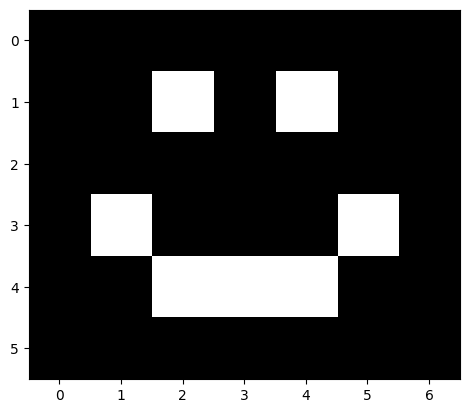

In [91]:
plt.imshow(img, cmap="gray") 

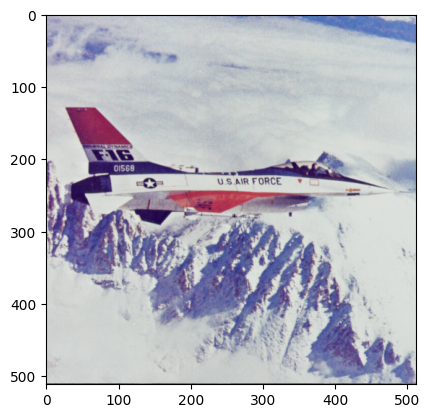

In [92]:
img = mpimg.imread(r"E:\team tasks\SkyXperts SW team\2025 - 2026 season\VisionCourse2023-master\VisionCourse2023-master\solved tasks\Images\airplane.bmp")

plt.imshow(img)

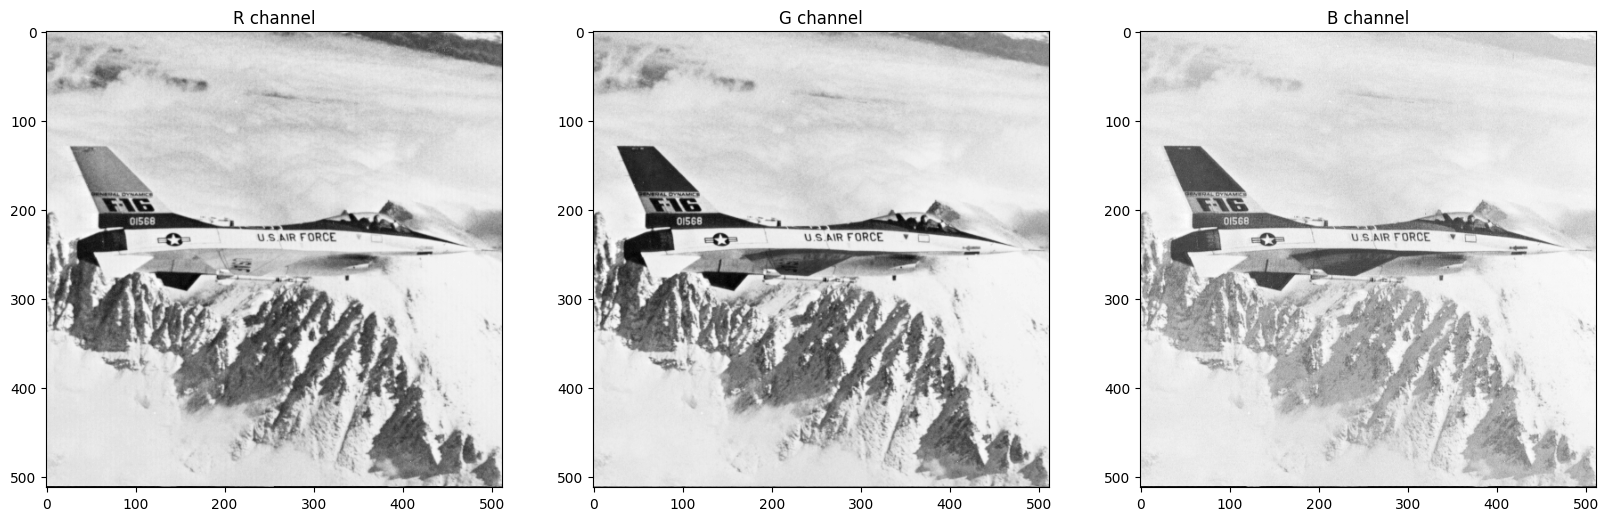

In [93]:
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

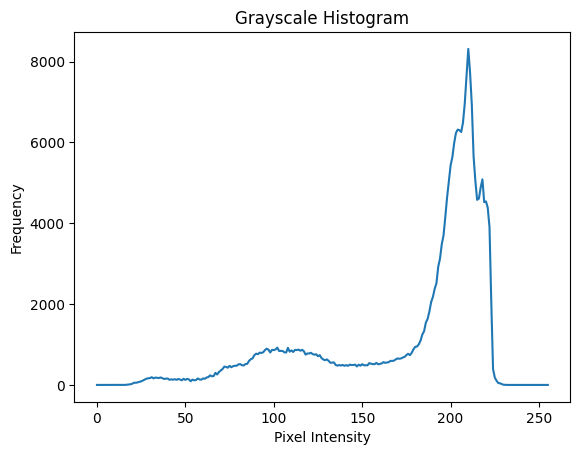

In [94]:

# Read image in grayscale
img = cv2.imread(r"E:\team tasks\SkyXperts SW team\2025 - 2026 season\VisionCourse2023-master\VisionCourse2023-master\solved tasks\Images\airplane.bmp", cv2.IMREAD_GRAYSCALE)

# Compute histogram
hist = cv2.calcHist([img],[0],None,[256],[0,256])
# Plot
plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


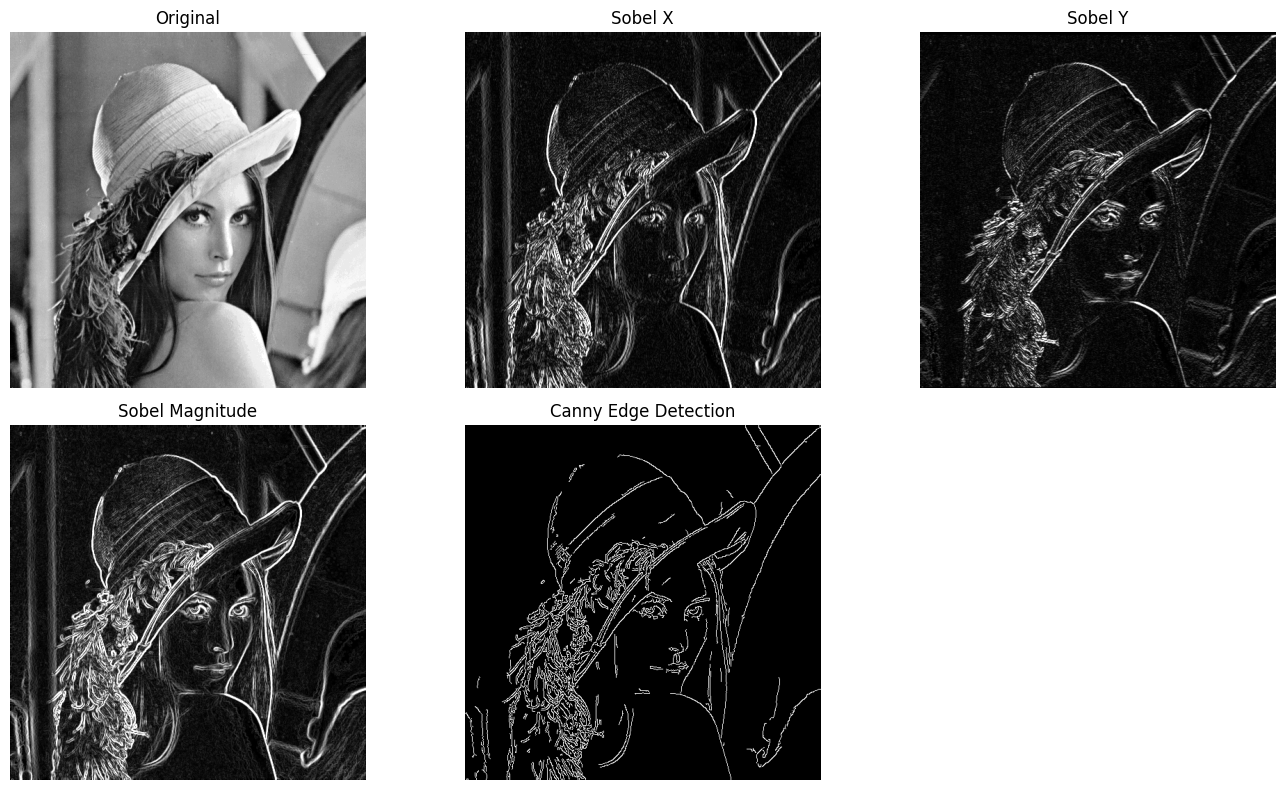

In [95]:

# Load grayscale image with OpenCV (more reliable than mpimg for Sobel)
img = cv2.imread(r"E:\team tasks\SkyXperts SW team\2025 - 2026 season\VisionCourse2023-master\VisionCourse2023-master\solved tasks\Images\lenna.bmp", cv2.IMREAD_GRAYSCALE)

# --- Sobel using OpenCV ---
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # X direction
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Y direction

# Convert back to displayable format (absolute + normalize)
sobel_x_img = cv2.convertScaleAbs(grad_x)
sobel_y_img = cv2.convertScaleAbs(grad_y)

# Magnitude
magnitude = cv2.magnitude(grad_x, grad_y)
magnitude = cv2.convertScaleAbs(magnitude)

# --- Canny edge detection ---
canny_edges = cv2.Canny(img, 100, 200)

# --- Plot results ---
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_img, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_img, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Sobel Magnitude")
plt.imshow(magnitude, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


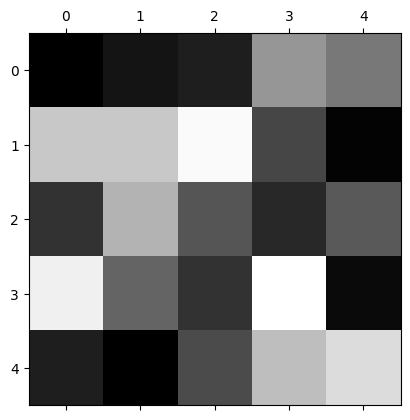

In [96]:
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

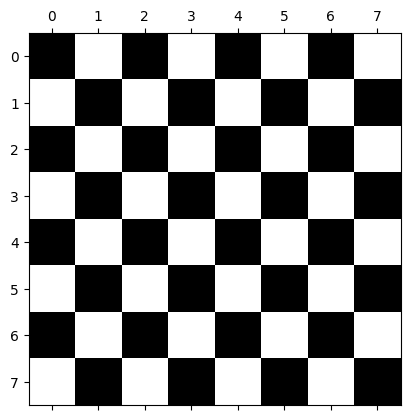

In [97]:
# chessboard pattern :)
chess = np.indices((8,8)).sum(axis=0) % 2  # 0/1 chessboard
plt.matshow(chess, cmap='gray')
plt.show()


(673, 1195, 3)


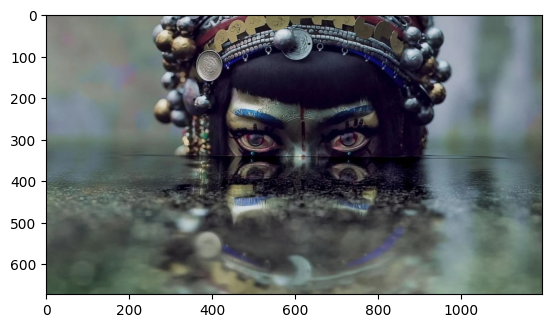

In [98]:
img = mpimg.imread(r'E:\team tasks\SkyXperts SW team\2025 - 2026 season\VisionCourse2023-master\VisionCourse2023-master\solved tasks\Images\agora_jibaro_1.jpg')
plt.imshow(img)
print(img.shape)

(450, 750, 3)


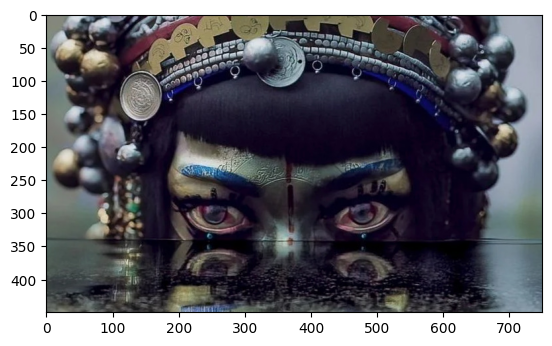

In [99]:
cropped = img[0:450, 250:1000, :]
plt.imshow(cropped)
print(cropped.shape)

(450, 750, 3)


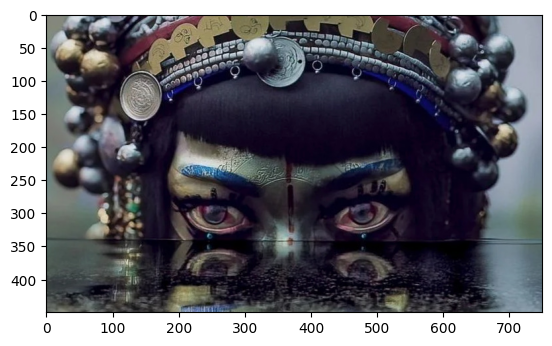

In [100]:
# comment for full picture
cropped = img[0:450, 250:1000, :]
print(cropped.shape)
img = cropped.copy()
plt.imshow(img)

In [101]:
pixel = np.reshape(img, (img.shape[0]*img.shape[1], 3)).astype(float)
centroids, _ = kmeans(pixel, 32)

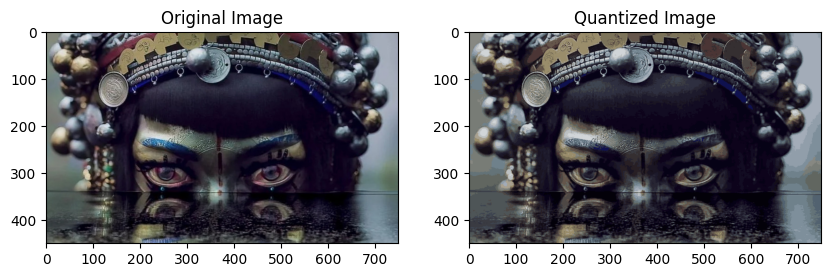

In [102]:
qnt, _ = vq(pixel, centroids)
centers_idx = np.reshape(qnt, (img.shape[0], img.shape[1]))
clustered = centroids[centers_idx.astype(int)]

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(clustered.astype(np.uint8))
plt.title('Quantized Image')
plt.show()

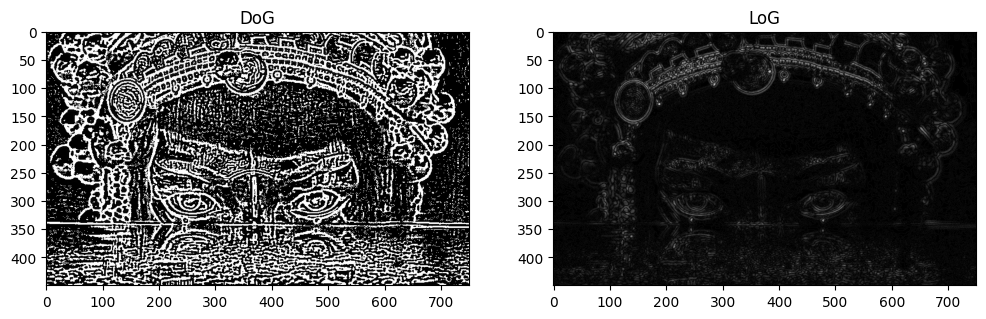

In [103]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# DoG
g1 = cv2.GaussianBlur(gray, (7,7), 1.5)
g2 = cv2.GaussianBlur(gray, (7,7), 3)
dog = g1 - g2
dog_norm = cv2.normalize(dog, None, 0, 255, cv2.NORM_MINMAX)

# LoG
img_blur = cv2.GaussianBlur(gray, (7,7), 1.5)
log = cv2.Laplacian(img_blur, cv2.CV_64F)
log_abs = cv2.convertScaleAbs(log)  # take absolute values for visualization

# Plot
plt.figure(figsize=(12, 6)) 
plt.subplot(1,2,1); plt.imshow(dog_norm, cmap='gray'); plt.title("DoG")
plt.subplot(1,2,2); plt.imshow(log_abs, cmap='gray'); plt.title("LoG")

plt.show()

try  pixel sorting  
next: dither + kuwahara | sharpen 